In [1]:
import geopandas as gpd
from scipy.spatial import KDTree
import numpy as np
from SimuSamp.functions.load.SpatDat import SpatDat
import pandas as pd
from SimuSamp.functions.compute.n_neighbours import neighbours

import matplotlib.pyplot as plt

In [2]:
parent_filepath = "../../../../Simulated WS Sampling/block_data"

sampleids = ["01_F", "01_G", "02_G", "02_H", "03_B", "03_H", "04_I", "06_H", "07_K", "08_J", "09_E", "10_B", "11_E", "11_F", "12_M", "13_G", "14_I", "15_G", "16_B", "17_I", "18_E", "19_F", "21_I", "22_N", "23_B", "24_I", "25_M", "26_I", "27_H", "28_FSC", "29_L", "30_D"]

microns_per_pixel=0.22715
mm2_per_pixels2 = (microns_per_pixel / 1000) ** 2

outpath_root = "../../../../Data/TMA_Spatial"

In [12]:
samples = []
coords = []
mean_nn_dists = []
for sampleid in ["11_F"]:

    spatdat = SpatDat(sampleid, parent_filepath, tma=True)

    for coord in spatdat.core_map["Coords"]:

        cells, anno = spatdat.subset_cores(coord)

        anno = anno[anno["layer"] == "analysis_area"].reset_index(drop=True)

        # Plot cells and core annotation ===============================
        cells.plot(color="brown", markersize=5, alpha=0.75);
        anno.plot(ax=plt.gca(), facecolor="none", edgecolor="black", linewidth=2, linestyle="--");

        plt.title(f"{sampleid} - {coord}");

        plt.savefig(f"{outpath_root}/TMA_annotation_plots/{sampleid}_{coord}_annotation.png", dpi=300, bbox_inches="tight", transparent=True);

        plt.gca().cla();
        plt.clf();
        plt.close();
        # =============================================================

        # Calculate mean nearest-neighbour distance ===================
        nn_mean = neighbours(cells, 1, edge_correction=True, core=anno["geometry"], distance=600/microns_per_pixel)

        if isinstance(nn_mean, float):
            nn_mean = None
        else:
            nn_mean = nn_mean.mean() * microns_per_pixel

        samples.append(sampleid)
        coords.append(coord)
        mean_nn_dists.append(nn_mean)
        # =============================================================

nn_results = pd.DataFrame({"Sampleid": samples, "Coords": coords, "Mean_NN_Distance": mean_nn_dists})

# nn_results.to_excel(f"{outpath_root}/TMA_mean_NN_distances.xlsx", index=False)

## Experimenting

In [3]:
spatdat = SpatDat("01_F", parent_filepath, tma=True)

In [19]:
spatdat.core_map

,TMAx,TMAy,Coords,PatientID,BlockDesignation,SampleID,Region,QC1_Included,QC2_Included,Annotation_File
0,13,10,13_10,1,F,01_F,IM,1,1,_119682_45340+3829+7999+7999
1,13,11,13_11,1,F,01_F,T,1,1,_119682_38402+3682+7999+7999


In [20]:
data, anno = spatdat.subset_cores("13_10")

<Axes: >

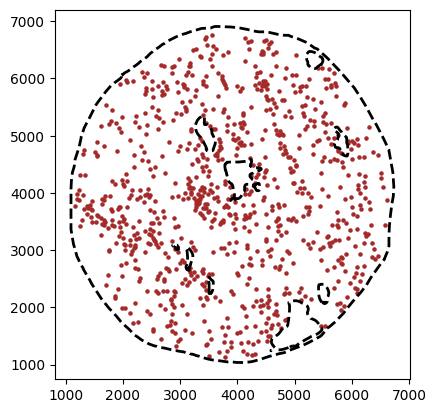

In [21]:
data.plot(markersize=5, color="brown")
anno[anno["layer"] == "analysis_area"].plot(ax=plt.gca(), color="None", edgecolor="black", linewidth=2, linestyle="--")

In [22]:
nn_res = neighbours(data, 1, edge_correction=True, core=anno[anno["layer"] == "analysis_area"]["geometry"], distance=600/microns_per_pixel).mean() * microns_per_pixel

In [23]:
print(f"The mean NN distance is {nn_res:.2f} microns.")

The mean NN distance is 3.23 microns.
